In [6]:
import numpy as np
import matplotlib.pyplot as plt

## Step0：Define <font color=red>Question</font>
Example：预测梦可宝进化后的CP（Combat Power）值
### 抽象问题：
找到一个函数（Function），输入梦可宝已知属性（Properties），预测升级后的CP值
![Question](./01_00_Question.png)

## Step1：Choose <font color=red>Model</font>
### Linear Model
假设：升级后CP只和升级前的CP值线性相关
![Model](./01_01_LinearModel0.png)

更一般的假设：升级后的CP和升级前的其它属性相关（例如：x<sub>i</sub>: hp、wieght、height...)
![Model](./01_01_LinearModel1.png)

## Step2：Pick the "Best" Function
已知: <font color=red><b>Training Data（训练数据）</b></font>(目前有n=10组数据x<sub>i</sub>, y<sub>i</sub>）

找到: w<sub>i</sub> b

使得: <font color=red><b>Loss Function（损失函数）</b></font>
![Loss Function](./01_02_LossFunction.png)

有最小值:
![Argmin Loss Function](./01_02_LossFunctionArgmin.png)

In [41]:
# ydata = b + w * xdata
# trainig data
x_data = [338.,333.,328.,207.,226.,25.,179.,60.,208.,606.]
y_data = [640.,633.,619.,393.,428.,27.,193.,66.,226.,1591.]

# we already know
best_b = [-188.4]
best_w = [2.67]

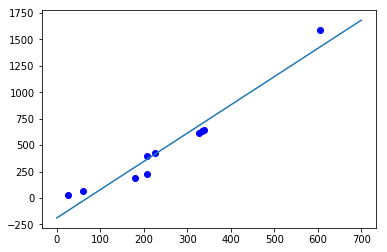

In [46]:
#draw training data
plt.plot(x_data,y_data,'bo')
plt.plot([0,700],[best_b[0],700*best_w[0]+best_b[0]])
plt.show()

## Step3：Gradient Descent（梯度下降法）
![Gradient Descent](./01_03_GradientDescent0.png)

每次让w<sub>i</sub> b 向“山下”（斜率为负）方向改变一个较小值 <font color=red><b>η</b></font>
![Gradient Descent](./01_03_GradientDescent.png)
使得

<center>L(w<sup>0</sup>,b<sup>0</sup>) > L(w<sup>1</sup>,b<sup>1</sup>) > ...</center>

从而逐渐逼近“山谷”（最小值）

其中 <font color=red><b>η</b></font>: <font color=red><b>Learning Rate</b></font>

损失函数偏微分（Loss Function Partial Derivative）
![Loss Function Partial Derivative](./01_03_LossFunctionPD.png)

### 下面，选取 η = 0.0000001 iteration=100000 做梯度下降的演示

In [16]:
x = np.arange(-200,-100,1) #bias
y = np.arange(-5,5,0.1) #weight
Z = np.zeros((len(x),len(y)))
X, Y = np.meshgrid(x,y)
for i in range(len(x)):
    for j in range(len(y)):
        b = x[i]
        w = y[j]
        Z[j][i] = 0
        for n in range(len(x_data)):
            Z[j][i] = Z[j][i] + (y_data[n] - b - w*x_data[n])**2
        Z[j][i] = Z[j][i]/len(x_data)


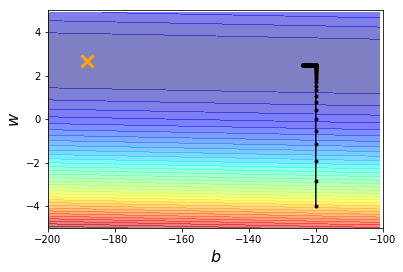

In [47]:
b = -120 # initial b
w = -4 # initial w
lr = 0.0000001 #learning rate
iteration = 100000

# Store initial values for plotting
b_history = [b]
w_history = [w]

# Iterations
for i in range(iteration):
    b_grad = 0.0
    w_grad = 0.0
    for n in range(len(x_data)):
        b_grad = b_grad - 2.0*(y_data[n] - b - w*x_data[n])*1.0
        w_grad = w_grad - 2.0*(y_data[n] - b - w*x_data[n])*x_data[n]
        
    # Update parameters
    b = b - lr * b_grad
    w = w - lr * w_grad
    
    # Store parameters for plotting
    b_history.append(b)
    w_history.append(w)
    

# plot the figure
plt.contourf(x,y,Z, 50, alpha=0.5, cmap=plt.get_cmap('jet'))
plt.plot(best_b,best_w,'x', ms=12, markeredgewidth=3, color='orange')
plt.plot(b_history,w_history,'o-',ms=3,lw=1.5,color='black')
plt.xlim(-200,-100)
plt.ylim(-5,5)
plt.xlabel(r'$b$',fontsize=16)
plt.ylabel(r'$w$',fontsize=16)
plt.show()

###  η 扩大10倍，结果如下：

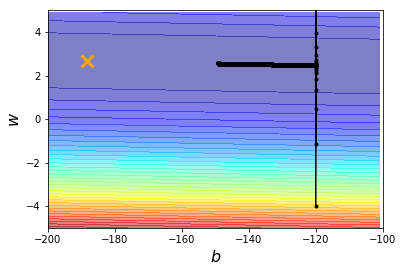

In [48]:
b = -120 # initial b
w = -4 # initial w
lr = 0.000001 #learning rate
iteration = 100000

# Store initial values for plotting
b_history = [b]
w_history = [w]

# Iterations
for i in range(iteration):
    b_grad = 0.0
    w_grad = 0.0
    for n in range(len(x_data)):
        b_grad = b_grad - 2.0*(y_data[n] - b - w*x_data[n])*1.0
        w_grad = w_grad - 2.0*(y_data[n] - b - w*x_data[n])*x_data[n]
        
    # Update parameters
    b = b - lr * b_grad
    w = w - lr * w_grad
    
    # Store parameters for plotting
    b_history.append(b)
    w_history.append(w)
    

# plot the figure
plt.contourf(x,y,Z, 50, alpha=0.5, cmap=plt.get_cmap('jet'))
plt.plot(best_b,best_w,'x', ms=12, markeredgewidth=3, color='orange')
plt.plot(b_history,w_history,'o-',ms=3,lw=1.5,color='black')
plt.xlim(-200,-100)
plt.ylim(-5,5)
plt.xlabel(r'$b$',fontsize=16)
plt.ylabel(r'$w$',fontsize=16)
plt.show()

###  η 再扩大10倍，结果如下：（不收敛了）

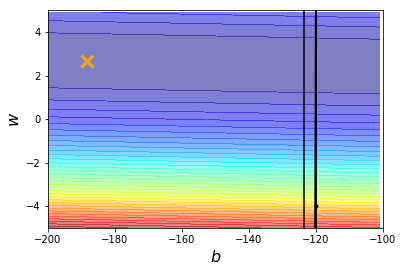

In [49]:
b = -120 # initial b
w = -4 # initial w
lr = 0.00001 #learning rate
iteration = 100000

# Store initial values for plotting
b_history = [b]
w_history = [w]

# Iterations
for i in range(iteration):
    b_grad = 0.0
    w_grad = 0.0
    for n in range(len(x_data)):
        b_grad = b_grad - 2.0*(y_data[n] - b - w*x_data[n])*1.0
        w_grad = w_grad - 2.0*(y_data[n] - b - w*x_data[n])*x_data[n]
        
    # Update parameters
    b = b - lr * b_grad
    w = w - lr * w_grad
    
    # Store parameters for plotting
    b_history.append(b)
    w_history.append(w)
    

# plot the figure
plt.contourf(x,y,Z, 50, alpha=0.5, cmap=plt.get_cmap('jet'))
plt.plot(best_b,best_w,'x', ms=12, markeredgewidth=3, color='orange')
plt.plot(b_history,w_history,'o-',ms=3,lw=1.5,color='black')
plt.xlim(-200,-100)
plt.ylim(-5,5)
plt.xlabel(r'$b$',fontsize=16)
plt.ylabel(r'$w$',fontsize=16)
plt.show()

### 对 w, b 采用不同的 learning rate，结果如下：

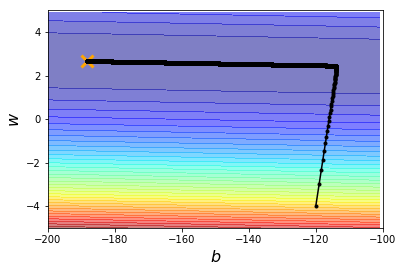

In [27]:
b = -120 # initial b
w = -4 # initial w
lr = 1 #learning rate
iteration = 100000

# Store initial values for plotting
b_history = [b]
w_history = [w]

lr_b = 0
lr_w = 0

# Iterations
for i in range(iteration):
    b_grad = 0.0
    w_grad = 0.0
    for n in range(len(x_data)):
        b_grad = b_grad - 2.0*(y_data[n] - b - w*x_data[n])*1.0
        w_grad = w_grad - 2.0*(y_data[n] - b - w*x_data[n])*x_data[n]
        
    lr_b = lr_b + b_grad ** 2
    lr_w = lr_w + w_grad ** 2

    # Update parameters
    b = b - lr/np.sqrt(lr_b) * b_grad
    w = w - lr/np.sqrt(lr_w) * w_grad
    
    # Store parameters for plotting
    b_history.append(b)
    w_history.append(w)
    

# plot the figure
plt.contourf(x,y,Z, 50, alpha=0.5, cmap=plt.get_cmap('jet'))
plt.plot([-188.4],[2.67],'x', ms=12, markeredgewidth=3, color='orange')
plt.plot(b_history,w_history,'o-',ms=3,lw=1.5,color='black')
plt.xlim(-200,-100)
plt.ylim(-5,5)
plt.xlabel(r'$b$',fontsize=16)
plt.ylabel(r'$w$',fontsize=16)
plt.show()